In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

C:\Users\Kenneth\Miniconda3\envs\clearbrain_lastresort\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


# Data 3

In [2]:
# Read in
df3 = pd.read_csv('../data/df3.csv')

In [3]:
# Inspect
df3.head()

,x,y
0,3.835354,6.987151
1,2.376280,3.267911
2,3.086790,6.582678
3,1.569807,1.770316
4,0.844609,2.152991


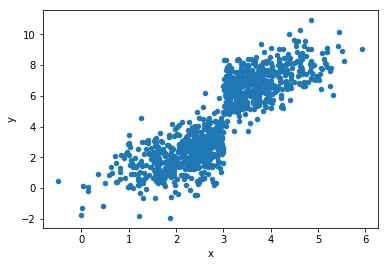

In [4]:
# Plot
df3.plot('x', 'y', kind='scatter')

In [5]:
# Hmm, interesting plot.  Fit a simple model again
model3 = smf.ols(
    formula='y ~ x',
    data=df3
)
model3_fit = model3.fit()

In [6]:
# Summarize
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     2734.
Date:                Mon, 18 May 2020   Prob (F-statistic):          4.47e-288
Time:                        23:30:05   Log-Likelihood:                -1720.3
No. Observations:                1000   AIC:                             3445.
Df Residuals:                     998   BIC:                             3454.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9722      0.128    -15.467      0.000      -2.222      -1.722
x              2.1622      0.041     52.285      0.000       2.081       2.243
==============================================================================
Omnibus:                        1.255   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.534   Jarque-Bera (JB):                1.302
Skew:                          -0.048   Prob(JB):                        0.521
Kurtosis:                       2.852   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

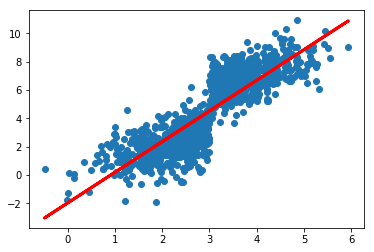

In [7]:
# Plot regression line over points
plt.scatter(df3['x'], df3['y'])
plt.plot(df3['x'], model3_fit.predict(df3), color='red', linewidth=3)
plt.show()

Seems to catch an overall trend but misses some important stuff in the middle

How can we deal with this?

- A "sigmoid" type function
- A discontinuous change in slope at 3

Let's try both

### "Sigmoid" function

For simplicity, let's use the logistic function, i.e. 1 / (1 + e^-x)

In [8]:
def create_x_logistic(x):
    return [1 / (1 + np.exp(-a)) for a in x]

In [9]:
model3_logistic = smf.ols(
    formula='y ~ create_x_logistic(x)',
    data=df3
)
model3_logistic_fit = model3_logistic.fit()

In [10]:
# Summarize
model3_logistic_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     978.8
Date:                Mon, 18 May 2020   Prob (F-statistic):          2.74e-150
Time:                        23:30:05   Log-Likelihood:                -2038.0
No. Observations:                1000   AIC:                             4080.
Df Residuals:                     998   BIC:                             4090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -18.2427      0.723    -25.225      0.000     -19.662     -16.824
create_x_logistic(x)    24.4270      0.781     31.285      0.000      22.895      25.959
==============================================================================
Omnibus:                        2.102   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.350   Jarque-Bera (JB):                2.000
Skew:                           0.106   Prob(JB):                        0.368
Kurtosis:                       3.052   Cond. No.                         24.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

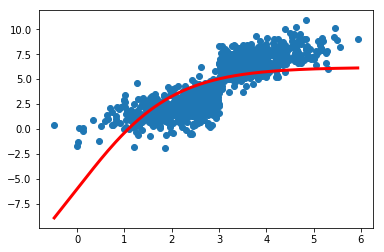

In [11]:
# Plot regression line over points
def sort_df(df, var='x'):
    return df.sort_values(by=[var])[var]

plt.scatter(df3['x'], df3['y'])
plt.plot(sort_df(df3), model3_logistic_fit.predict(sort_df(df3)), color='red', linewidth=3)
plt.show()

Well that looks awful.

It's actually because of how the logistic curve is designed to function (https://en.wikipedia.org/wiki/Logistic_function).  The first thing:

- The midpoint, which by default is x = 0, looks to be around x = 3 here.  We could either plug that value in or transform x to have a midpoint of zero.  Let's do the former because we're lazy.

In [12]:
def create_x_logistic_midpoint(x):
    return [1 / (1 + np.exp(-(a - 3))) for a in x]

In [13]:
model3_logistic_midpoint = smf.ols(
    formula='y ~ create_x_logistic_midpoint(x)',
    data=df3
)
model3_logistic_midpoint_fit = model3_logistic_midpoint.fit()

In [14]:
# Summarize
model3_logistic_midpoint_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     3306.
Date:                Mon, 18 May 2020   Prob (F-statistic):          5.00e-319
Time:                        23:30:05   Log-Likelihood:                -1648.9
No. Observations:                1000   AIC:                             3302.
Df Residuals:                     998   BIC:                             3312.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.8082      0.097     -8.290      0.000      -1.000      -0.617
create_x_logistic_midpoint(x)    10.6542      0.185     57.502      0.000      10.291      11.018
==============================================================================
Omnibus:                        0.511   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.774   Jarque-Bera (JB):                0.501
Skew:                          -0.055   Prob(JB):                        0.778
Kurtosis:                       2.994   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

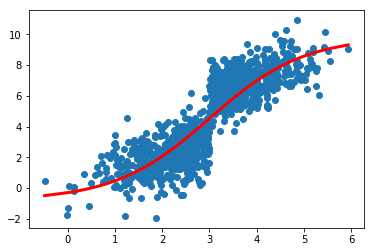

In [15]:
# Plot regression line over points
plt.scatter(df3['x'], df3['y'])
plt.plot(sort_df(df3), model3_logistic_midpoint_fit.predict(sort_df(df3)), color='red', linewidth=3)
plt.show()

Looks much better, but it might fit better if it was steeper.  Let's vary a few "steepness" values (the default is 1) and see if any seems particularly good.

In [16]:
def sim_steepness(k):
    def create_x_logistic_midpoint_steepness(x, k):
        return [1 / (1 + np.exp(-k * (a - 3))) for a in x]
    
    # Fit model
    model3_logistic_midpoint_steepness = smf.ols(
        formula='y ~ x + create_x_logistic_midpoint_steepness(x, k)',
        data=df3
    )
    model3_logistic_midpoint_steepness_fit = model3_logistic_midpoint_steepness.fit()
    
    return model3_logistic_midpoint_steepness_fit

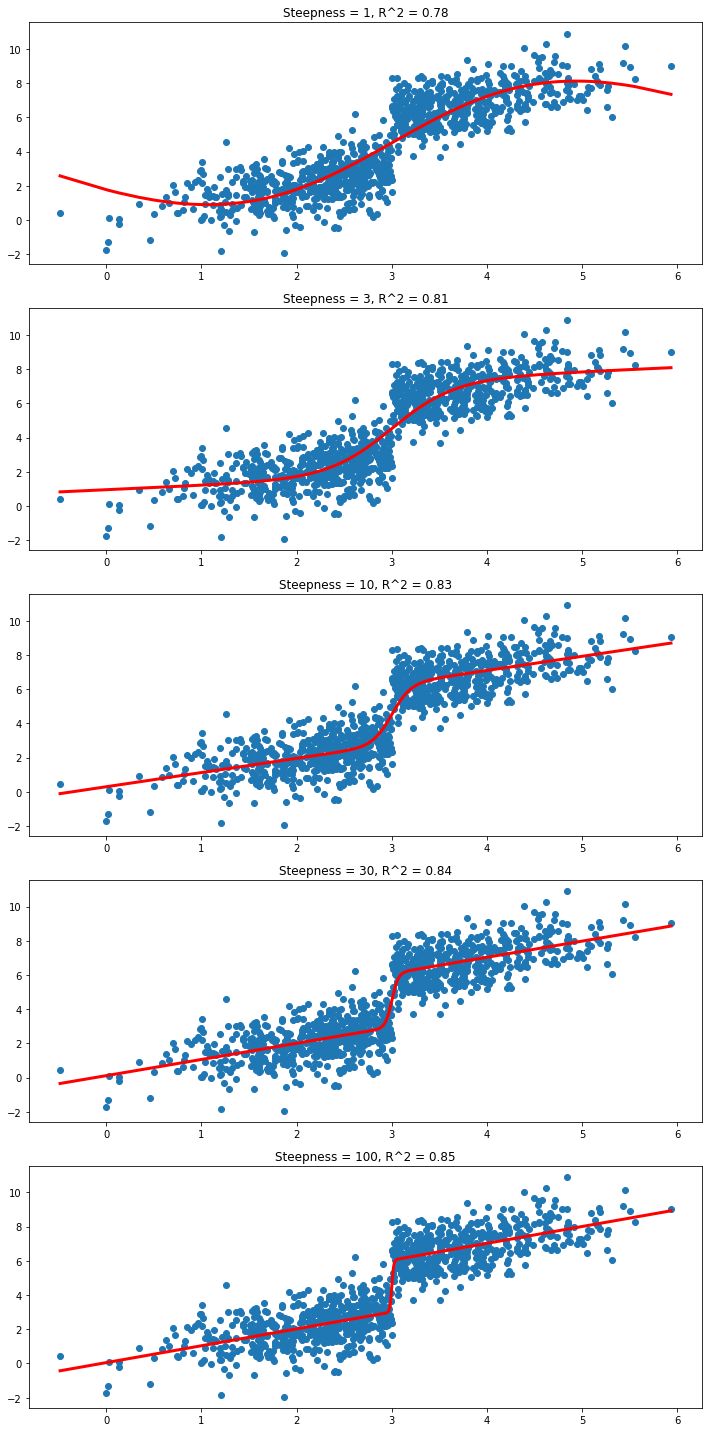

In [17]:
# Since 1 didn't seem "steep" enough, let's use a logarithmic mesh from 1 to 100 (i.e. 1, 3, 10, 30, 100)
mesh = [1, 3, 10, 30, 100]
fig, axs = plt.subplots(len(mesh), figsize=(10, 20))

for i, k in enumerate(mesh):
    # Generate fit
    loop_model_fit = sim_steepness(k)
    
    # Plot scatterplot and line fit
    axs[i].set_title(f'Steepness = {k}, R^2 = {round(loop_model_fit.rsquared, 2)}')
    axs[i].scatter(df3['x'], df3['y'])
    axs[i].plot(sort_df(df3), loop_model_fit.predict(sort_df(df3)), color='red', linewidth=3)

plt.tight_layout()
plt.show()

It actually looks like more steepness ~ better fit.  And the last one actually looks more or less two lines with roughly the same slope.  Since we wanted to try that too, let's see how that compares!

### A discontinuous change in slope at 3

Since it's hard to tell if the slope itself changes, let's add both a term for the change in slope and one for the change in slope at that point (see previous notebook for a walkthrough).

In [18]:
def create_x_gt3_ind(x):
    return [1 if a > 3 else 0 for a in x]

def create_x_gt3_slope(x):
    return [a - 3 if a > 3 else 0 for a in x]

In [19]:
model3_discontinuity = smf.ols(
    formula='y ~ x + create_x_gt3_ind(x) + create_x_gt3_slope(x)',
    data=df3
)
model3_discontinuity_fit = model3_discontinuity.fit()

In [20]:
# Summarize
model3_discontinuity_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     1867.
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        23:30:06   Log-Likelihood:                -1434.4
No. Observations:                1000   AIC:                             2877.
Df Residuals:                     996   BIC:                             2896.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.1496      0.156      0.961      0.337      -0.156       0.455
x                         0.9403      0.070     13.439      0.000       0.803       1.078
create_x_gt3_ind(x)       3.0094      0.109     27.540      0.000       2.795       3.224
create_x_gt3_slope(x)     0.1160      0.106      1.097      0.273      -0.092       0.324
==============================================================================
Omnibus:                        1.954   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.377   Jarque-Bera (JB):                1.969
Skew:                          -0.003   Prob(JB):                        0.374
Kurtosis:                       3.217   Cond. No.                         19.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

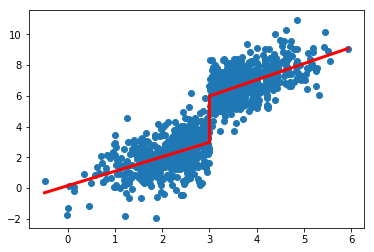

In [21]:
# Plot regression line over points
plt.scatter(df3['x'], df3['y'])
plt.plot(sort_df(df3), model3_discontinuity_fit.predict(sort_df(df3)), color='red', linewidth=3)
plt.show()

This seems to do just as well as the heavy steepness, and the x >= 3 is not statistically significant at the 95% confidence level so it seems like we more-or-less have the same slope and the only difference is a translation.

Here, it's important to understand **why** the data would look like this.  There are legitimate situations that could cause this, for example say that you were understanding profit over time and in the middle of your observation windows a radically new incentive plan went into effect for the entire company.  Some nuance and due diligence aside, this could be measuring the effect of that (which I have been asked to measure before)!

And, while fitting the sigmoid was fun, it doesn't really have much intuitive appeal here on top of the "bump".

# Data 4

In [22]:
# Read in
df4 = pd.read_csv('../data/df4.csv')

In [23]:
# Inspect
df4.head()

,x,y
0,B,3.240492
1,B,3.177085
2,A,-0.755100
3,A,0.651925
4,A,0.749837


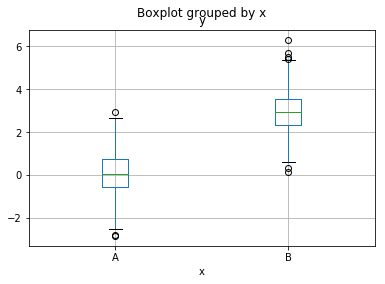

In [24]:
# Plot
df4.boxplot('y', by='x')

In [25]:
# Fit a simple model
model4 = smf.ols(
    formula='y ~ x',
    data=df4
)
model4_fit = model4.fit()

In [26]:
# Summarize
model4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     2069.
Date:                Mon, 18 May 2020   Prob (F-statistic):          1.48e-245
Time:                        23:30:06   Log-Likelihood:                -1423.9
No. Observations:                1000   AIC:                             2852.
Df Residuals:                     998   BIC:                             2862.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0570      0.047      1.221      0.222      -0.035       0.149
x[T.B]         2.9011      0.064     45.488      0.000       2.776       3.026
==============================================================================
Omnibus:                        0.035   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.982   Jarque-Bera (JB):                0.038
Skew:                           0.014   Prob(JB):                        0.981
Kurtosis:                       2.989   Cond. No.                         2.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This is a bit less straight-forward to visualize than continuous data.  Let's create a function that aggregates average actuals (i.e. mean(y)) and average predictions (i.e. mean(pred)) for each value of x.  Derek calls this graph a "univariate", because somebody told him that's what it was called and it stuck even though it seems odd because you're plotting a lot of things against your x-axis.  Whatever.

In [27]:
def plot_univariate(df, x, y, model_fit):
    # Add prediction
    df = df.assign(p = model_fit.predict(df))
    
    # Aggregate
    df_agg = (
        df
        .groupby(x)
        .agg(
            n=(y, 'count'),
            y_mean=(y, 'mean'),
            p_mean=('p', 'mean'),
        )
        .reset_index()
    )
    
    # Plot
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
    
    # First plot: Counts
    ax1.bar(x, 'n', data=df_agg)
    
    # Second plot: Average actuals and predicted
    ax2.plot(x, 'y_mean', data=df_agg, label='Actual', marker='.', color='green', linewidth=3)
    ax2.plot(x, 'y_mean', data=df_agg, label='Predicted', marker='.', color='red', linewidth=3)
    
    plt.legend()
    plt.show()

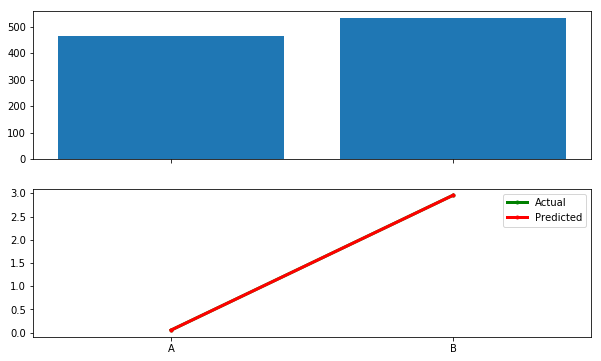

In [28]:
plot_univariate(df4, 'x', 'y', model4_fit)

It looks like the mean actuals and predicted are more-or-less the same, so this is probably as good as we can do without any extra predictors.

# Data 5

In [29]:
# Read in
df5 = pd.read_csv('../data/df5.csv')

In [30]:
# Inspect
df5.head()

,x1,x2,y
0,A2,B1,5.193748
1,A1,B1,0.900294
2,A1,B1,-0.432256
3,A2,B1,4.349755
4,A2,B2,1.375544


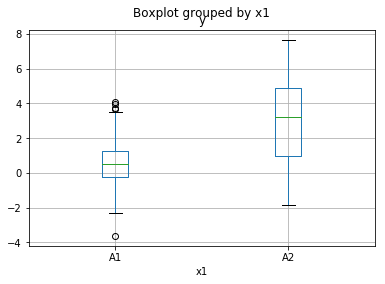

In [31]:
# Plot x1
df5.boxplot('y', by='x1')

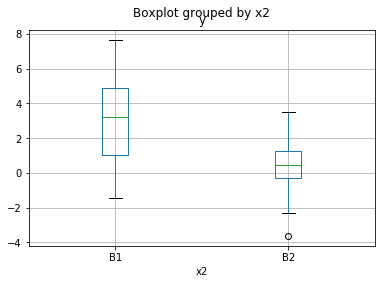

In [32]:
# Plot x2
df5.boxplot('y', by='x2')

In [33]:
# Fit a simple model
model5 = smf.ols(
    formula='y ~ x1 + x2',
    data=df5
)
model5_fit = model5.fit()

In [34]:
# Summarize
model5_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     1067.
Date:                Mon, 18 May 2020   Prob (F-statistic):          1.73e-248
Time:                        23:30:07   Log-Likelihood:                -1629.7
No. Observations:                1000   AIC:                             3265.
Df Residuals:                     997   BIC:                             3280.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7399      0.067     25.883      0.000       1.608       1.872
x1[T.A2]       2.5369      0.078     32.421      0.000       2.383       2.690
x2[T.B2]      -2.6149      0.078    -33.405      0.000      -2.769      -2.461
==============================================================================
Omnibus:                       10.531   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                8.776
Skew:                           0.154   Prob(JB):                       0.0124
Kurtosis:                       2.660   Cond. No.                         3.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

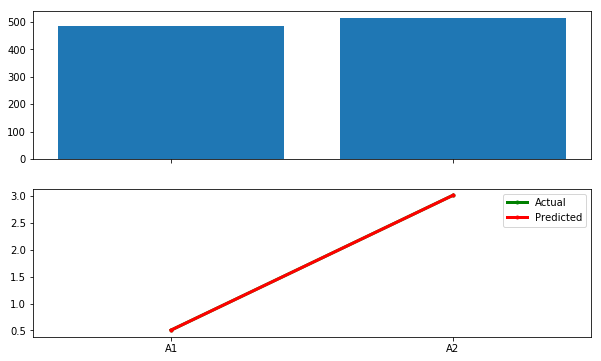

In [35]:
plot_univariate(df5, 'x1', 'y', model5_fit)

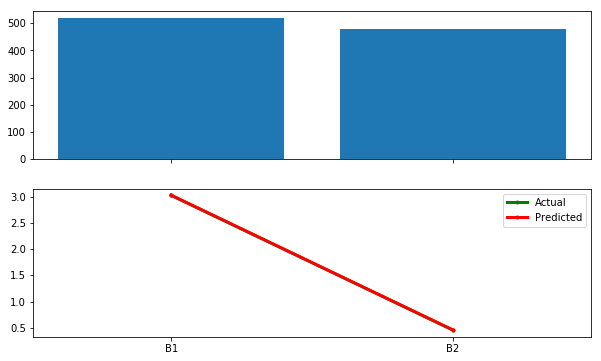

In [36]:
plot_univariate(df5, 'x2', 'y', model5_fit)

As with data set 4, it looks like the mean actuals and predicted are more-or-less the same.  But we have a second variable, so what if we added an interaction term?

In [37]:
# Fit
model5_int_via_asterisk = smf.ols(
    formula='y ~ x1*x2',
    data=df5
)
model5_int_via_asterisk_fit = model5_int_via_asterisk.fit()

In [38]:
# Summarize
model5_int_via_asterisk_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     1215.
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        23:30:07   Log-Likelihood:                -1432.3
No. Observations:                1000   AIC:                             2873.
Df Residuals:                     996   BIC:                             2892.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.0524      0.063     16.581      0.000       0.928       1.177
x1[T.A2]              3.8886      0.089     43.696      0.000       3.714       4.063
x2[T.B2]             -1.1555      0.092    -12.495      0.000      -1.337      -0.974
x1[T.A2]:x2[T.B2]    -2.8248      0.129    -21.957      0.000      -3.077      -2.572
==============================================================================
Omnibus:                        3.681   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.159   Jarque-Bera (JB):                3.709
Skew:                           0.129   Prob(JB):                        0.157
Kurtosis:                       2.848   Cond. No.                         6.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looks like a bit better regression!

But this is a bit surprising.  The interaction of x1 and x2 has 4 possible values, but only one got added here.

Let's try creating an explicit interaction variable instead to see if anything changes.

In [39]:
def create_x1_x2_int(x1, x2):
    return [a1 + a2 for (a1, a2) in zip(x1, x2)]

In [40]:
# Fit
model5_int_via_function = smf.ols(
    formula='y ~ x1 + x2 + create_x1_x2_int(x1, x2)',
    data=df5
)
model5_int_via_function_fit = model5_int_via_function.fit()

In [41]:
# Summarize
model5_int_via_function_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     1215.
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        23:30:07   Log-Likelihood:                -1432.3
No. Observations:                1000   AIC:                             2873.
Df Residuals:                     996   BIC:                             2892.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            1.0524      0.063     16.581      0.000       0.928       1.177
x1[T.A2]                             1.5797      0.043     36.417      0.000       1.495       1.665
x2[T.B2]                            -0.9423      0.044    -21.281      0.000      -1.029      -0.855
create_x1_x2_int(x1, x2)[T.A1B2]    -0.2132      0.056     -3.834      0.000      -0.322      -0.104
create_x1_x2_int(x1, x2)[T.A2B1]     2.3089      0.053     43.214      0.000       2.204       2.414
create_x1_x2_int(x1, x2)[T.A2B2]    -0.7291      0.039    -18.502      0.000      -0.806      -0.652
==============================================================================
Omnibus:                        3.681   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.159   Jarque-Bera (JB):                3.709
Skew:                           0.129   Prob(JB):                        0.157
Kurtosis:                       2.848   Cond. No.                     3.84e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.24e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [42]:
# Are the predictions entirely the same?
assert all(model5_int_via_asterisk_fit.predict(df5) == model5_int_via_function_fit.predict(df5))

AssertionError: 

In [ ]:
# What about within some reasonable tolerance like 10^-10?
assert all(abs(model5_int_via_asterisk_fit.predict(df5) - model5_int_via_function_fit.predict(df5)) < 10 ** -10)

Derek isn't sure if statsmodel is doing something clever by default with interactions or if it's unintended but this is reasonable.  Two things are going on here:

1. Matrix manipulation and linear dependence
2. Truncation/rounding error

##### Matrix manipulation and linear dependence

The two models above are linearly equivalent.  Say we had a simple, 4 row data set that looks like this)

```
x1 x2
A1 B1
A1 B2
A2 B1
A2 B2
```

Which translates to a binary matrix like this:

```
A1 A2 B1 B2
 1  0  1  0
 1  0  0  1
 0  1  1  0
 0  1  0  1
```

Since A1 and B1 were the reference categories and redundant, let's drop those to create this:

```
A2 B2
 0  0
 0  1
 1  0
 1  1
```

Now let's look at the matrices for the asterisk regression:

```
A2 B2 A2B2
 0  0    0
 0  1    0
 1  0    0
 1  1    1
```

Now let's look at the matrices for the manual interaction regression (using A1B1 as the reference category):

```
A2 B2 A1B2 A2B1 A2B2
 0  0    0    0    0
 0  1    1    0    0
 1  0    0    1    0
 1  1    0    0    1
```

The columns A1B2 and A2B1 (the only difference with the asterisk regression table) are linear combinations of the A2, B2, and A2B2, i.e.:

- `A1B2 = B2 - A2B2`
- `A2B1 = A2 - A2B2`

Therefore we aren't *really* using a different model in the manual interaction regression compared to the asterisk.  This linear dependence is why statsmodel gave us that warning!


##### Truncation/rounding error

Derek thinks trunction/rounding error is playing into the very slight differences.  Each of our coefficients is stored up to some number of digits (these are all numpy float 64s), the truncation based on the size alloted for the digits it likely resulting in the end predictions being slight different.

As a dramatic example, say that our digits could only be stored up to two decimal points (e.g. 0.45 instead of 0.448).  This will have an impact (though likely small depending on the scale of the predicotrs) on the resulting prediction math.  If you compound this with more variables and different model specifications, this can aggregate into something pronounced.

Always keep in mind that the optimal solutions of models depend on having a high degree of numeric precision.  Again, here the effect is very minor because we're seeing, at most, a difference of 10^-10 (not really perceptable to us here except in a macro sense, and might even be less than that).